## Set up

In [284]:
#import StringIO
import quandl
import time
from pytrends.request import TrendReq
quandl.ApiConfig.api_key = 'aJQps1DMV2FYNGxsqoTx'

from vars import google_username, google_password

import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

#import datalab.bigquery as bq

import tensorflow as tf
print("done")

done


## Get the data

In [285]:
pytrend = TrendReq(google_username, google_password, custom_useragent='fin-data-local')

def make_gtrend_table_flawed(lst_of_words, start_year=2014, num_yrs=1):
    cols = []
    while lst_of_words:
        subset = []
        for _ in range(0, 5):
            if lst_of_words:
                subset.append(lst_of_words.pop())
        rows = []
        for yr in range(start_year, start_year + num_yrs):
            for month in ['1', '4', '7', '10']:
                str_yr = str(yr)
                trend_payload = {'q': ",".join(subset), 'date': month+'/'+str_yr+' 3m'}
                result = pytrend.trend(trend_payload, return_type='dataframe')
                rows.append(result)
                time.sleep(7)
        one_col = pd.concat(rows)
        cols.append(one_col)
    trend_data = pd.concat(cols, axis=1)
    return trend_data

def make_gtrend_table(word, year = 2014):
    str_yr = str(year)
    trend_payload = {'q': word, 'date': '1'+'/'+str_yr+' 36m'}
    result = pytrend.trend(trend_payload, return_type='dataframe')
    return result


In [286]:
lst_of_words = ["debt", "dow jones industrial", "economy", "money", "s&p 500","portfolio", "inflation", "revenue", "credit", "profit"]
def get_pytrend_data(lst_of_words, cols):
    count = 0
    while lst_of_words:
        cand = lst_of_words.pop()
        if cand not in cols:
            try:
                res = make_gtrend_table(cand)
                cols[cand] = res
            except Exception as e:
                if count > 10:
                    time.sleep(7)
                    count = 0
                lst_of_words.append(cand)
                count += 1
get_pytrend_data(lst_of_words, cols)
total_trend_data = pd.concat(cols.values(), axis=1)
total_trend_data.describe()


,revenue,debt,inflation,s&p 500,dow jones industrial,profit,credit,money,portfolio,economy
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,67.775641,49.064103,78.750000,36.589744,22.352564,84.121795,88.602564,77.147436,87.044872,76.551282
std,10.792216,7.011216,9.907719,10.622479,10.624867,8.384581,3.618375,4.557595,7.482748,8.984786
min,37.000000,28.000000,53.000000,23.000000,12.000000,53.000000,80.000000,69.000000,58.000000,51.000000
25%,62.000000,46.000000,70.000000,30.000000,17.000000,79.000000,86.000000,74.000000,83.000000,70.000000
50%,65.000000,49.000000,82.000000,35.000000,20.000000,86.000000,89.000000,77.000000,88.000000,79.000000
75%,77.000000,52.000000,86.250000,39.250000,24.000000,90.000000,91.000000,79.000000,93.000000,82.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [287]:
# trend_data_2014 = trend_data
# trend_data_2014.to_csv(path_or_buf="trend_data_2014.csv")

total_trend_data.to_csv(path_or_buf="real_trend_data_2014-16.csv")


In [288]:
total_trend_data = total_trend_data.rename(index=str, columns={"debt":"debt_gtrend", "dow jones industrial": "dow jones industrial_gtrend", "economy": "economy_gtrend", "money": "money_gtrend", "s&p 500": "s&p 500_gtrend"})
total_trend_data.describe()
closing_data.describe()
print(closing_data)
#new_closing_data = pd.concat([total_trend_data, closing_data])
#print(new_closing_data)

              snp_close  revenue_gtrend  debt_gtrend  inflation_gtrend  \
Date                                                                     
2014-01-05  1831.369995            65.0         47.0              81.0   
2014-01-12  1842.369995            69.0         50.0              83.0   
2014-01-19  1838.699951            68.0         48.0              82.0   
2014-01-26  1790.290039            79.0         53.0              88.0   
2014-02-02  1782.589966            85.0         54.0              89.0   
2014-02-09  1797.020020            84.0         53.0              83.0   
2014-02-16  1838.630005            89.0         51.0              85.0   
2014-02-23  1836.250000            88.0         51.0              87.0   
2014-03-02  1859.449951            84.0         52.0              81.0   
2014-03-09  1878.040039            81.0         49.0              83.0   
2014-03-16  1841.130005            78.0         48.0             100.0   
2014-03-23  1866.520020            83.

In [289]:
snp = quandl.get("YAHOO/INDEX_GSPC", start_date="2014-1-1", end_date="2016-12-31", collapse="weekly")

print("done")
print(snp)

done
                   Open         High          Low        Close        Volume  \
Date                                                                           
2014-01-05  1833.209961  1838.239990  1829.130005  1831.369995  2.774270e+09   
2014-01-12  1840.060059  1843.150024  1832.430054  1842.369995  3.335710e+09   
2014-01-19  1844.229980  1846.040039  1835.229980  1838.699951  3.626120e+09   
2014-01-26  1826.959961  1826.959961  1790.290039  1790.290039  4.618450e+09   
2014-02-02  1790.880005  1793.880005  1772.260010  1782.589966  4.059690e+09   
2014-02-09  1776.010010  1798.030029  1776.010010  1797.020020  3.775990e+09   
2014-02-16  1828.459961  1841.650024  1825.589966  1838.630005  3.114750e+09   
2014-02-23  1841.069946  1846.130005  1835.599976  1836.250000  3.403880e+09   
2014-03-02  1855.119995  1867.920044  1847.670044  1859.449951  3.917450e+09   
2014-03-09  1878.520020  1883.569946  1870.560059  1878.040039  3.564740e+09   
2014-03-16  1845.069946  1852.43994

In [311]:
total_trend_data = pd.DataFrame()
lst = ["revenue", "debt", "inflation", "s&p 500", "dow jones industrial", "profit", "credit", "money", "portfolio", "economy"]
dic = {k : np.float64 for k in lst}
total_trend_data = pd.read_csv("real_trend_data_2014-16.csv", dtype=dic)
total_trend_data['Date'] = total_trend_data['Date'].apply(pd.to_datetime)
total_trend_data = total_trend_data.set_index("Date")
print(total_trend_data)

            revenue  debt  inflation  s&p 500  dow jones industrial  profit  \
Date                                                                          
2014-01-05     65.0  47.0       81.0     27.0                  16.0    82.0   
2014-01-12     69.0  50.0       83.0     30.0                  15.0    83.0   
2014-01-19     68.0  48.0       82.0     27.0                  12.0    84.0   
2014-01-26     79.0  53.0       88.0     34.0                  15.0    87.0   
2014-02-02     85.0  54.0       89.0     38.0                  23.0    86.0   
2014-02-09     84.0  53.0       83.0     28.0                  18.0    84.0   
2014-02-16     89.0  51.0       85.0     29.0                  17.0    87.0   
2014-02-23     88.0  51.0       87.0     33.0                  16.0    90.0   
2014-03-02     84.0  52.0       81.0     37.0                  19.0    90.0   
2014-03-09     81.0  49.0       83.0     29.0                  17.0    87.0   
2014-03-16     78.0  48.0      100.0     28.0       

In [291]:
# %%sql --module market_data_query
# SELECT * FROM $market_data_table LIMIT 1

In [292]:
# snp = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.snp')).to_dataframe().set_index('Date')
# nyse = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.nyse')).to_dataframe().set_index('Date')
# djia = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.djia')).to_dataframe().set_index('Date')
# nikkei = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.nikkei')).to_dataframe().set_index('Date')
# hangseng = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.hangseng')).to_dataframe().set_index('Date')
# ftse = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.ftse')).to_dataframe().set_index('Date')
# dax = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.dax')).to_dataframe().set_index('Date')
# aord = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.aord')).to_dataframe().set_index('Date')


## Munge the data

In [312]:
closing_data = pd.DataFrame()

closing_data['snp_close'] = snp['Close']

for k in total_trend_data.keys():
    closing_data[k+'_gtrend'] = total_trend_data[k]

# Pandas includes a very convenient function for filling gaps in the data.
closing_data = closing_data.fillna(method='ffill')
print(closing_data)
print(total_trend_data)



              snp_close  revenue_gtrend  debt_gtrend  inflation_gtrend  \
Date                                                                     
2014-01-05  1831.369995            65.0         47.0              81.0   
2014-01-12  1842.369995            69.0         50.0              83.0   
2014-01-19  1838.699951            68.0         48.0              82.0   
2014-01-26  1790.290039            79.0         53.0              88.0   
2014-02-02  1782.589966            85.0         54.0              89.0   
2014-02-09  1797.020020            84.0         53.0              83.0   
2014-02-16  1838.630005            89.0         51.0              85.0   
2014-02-23  1836.250000            88.0         51.0              87.0   
2014-03-02  1859.449951            84.0         52.0              81.0   
2014-03-09  1878.040039            81.0         49.0              83.0   
2014-03-16  1841.130005            78.0         48.0             100.0   
2014-03-23  1866.520020            83.

In [294]:
for k in total_trend_data.keys():
    closing_data[k+'_gtrend'] = total_trend_data[k]


In [295]:
closing_data.describe()
#closing_data.to_csv(path_or_buf="closing_data_2014-16.csv")

,snp_close,debt_gtrend,dow jones industrial_gtrend,economy_gtrend,money_gtrend,s&p 500_gtrend
count,157.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,2029.128919,5.333333,0.006410,7.647436,76.942308,0.205128
std,107.489225,1.114904,0.080064,1.484564,11.917588,0.405096
min,1782.589966,3.000000,0.000000,5.000000,48.000000,0.000000
25%,1955.060059,4.000000,0.000000,6.750000,70.750000,0.000000
50%,2051.820068,6.000000,0.000000,8.000000,81.000000,0.000000
75%,2101.489990,6.000000,0.000000,9.000000,85.000000,0.000000
max,2263.790039,9.000000,1.000000,10.000000,100.000000,1.000000


In [313]:
#will the google trends data predict whether next day will be higher than last 21 day avg
def make_log_avg_return(closing_data, delta_days=3):
    log_avg_return_data = pd.DataFrame()
    for k in closing_data:
        orig_col = closing_data[k]
        test_col = closing_data[k].copy()
        for i in range(delta_days, test_col.size):
            avg = sum(orig_col[i-delta_days:i]) / float(delta_days)
            test_col[i] = np.log(orig_col[i] / avg)
        if "gtrend" in k:
            log_avg_return_data[k] = test_col[delta_days:].shift()
        else:
            log_avg_return_data[k] = test_col[delta_days:]
    return log_avg_return_data
log_avg_return_data = make_log_avg_return(closing_data)
print (log_avg_return_data)
log_avg_return_data.corr().iloc[:,0]
    

            snp_close  revenue_gtrend  debt_gtrend  inflation_gtrend  \
Date                                                                   
2014-01-26  -0.026017             NaN          NaN               NaN   
2014-02-02  -0.022848        0.159792     0.092170          0.070618   
2014-02-09  -0.003799        0.165985     0.070316          0.053859   
2014-02-16   0.026824        0.082692     0.025479         -0.039375   
2014-02-23   0.016567        0.073820    -0.044736         -0.019418   
2014-03-02   0.019267        0.022990    -0.032157          0.015444   
2014-03-09   0.017870       -0.035091     0.006431         -0.048202   
2014-03-16  -0.009074       -0.071459    -0.046520         -0.015937   
2014-03-23   0.003747       -0.078068    -0.054067          0.178330   
2014-03-30  -0.002300        0.024391     0.026492          0.033523   
2014-04-06   0.005376        0.064022    -0.027399         -0.060169   
2014-04-13  -0.025764        0.100083     0.000000         -0.11

snp_close                      1.000000
revenue_gtrend                -0.225864
debt_gtrend                   -0.255880
inflation_gtrend              -0.209819
s&p 500_gtrend                -0.400150
dow jones industrial_gtrend   -0.497770
profit_gtrend                 -0.231047
credit_gtrend                 -0.083770
money_gtrend                  -0.132091
portfolio_gtrend              -0.217502
economy_gtrend                -0.345766
Name: snp_close, dtype: float64

In [314]:
#will google trends data predict whether next 21 day avg is higher than last 21 day avg
def make_log_avg_return3(closing_data, delta_days=3):
    log_avg_return_data = pd.DataFrame()
    for k in closing_data:
        if "gtrend" in k:
            orig_col = closing_data[k]
            test_col = closing_data[k].copy()
            for i in range(delta_days, test_col.size-delta_days+1):
                avg = sum(orig_col[i-delta_days:i]) / float(delta_days)
                test_col[i] = np.log(orig_col[i] / avg)
            log_avg_return_data[k] = test_col[delta_days:].shift()
        else:
            orig_col = closing_data[k]
            test_col = closing_data[k].copy()
            for i in range(delta_days, test_col.size-delta_days+1):
                prev_avg = sum(orig_col[i-delta_days:i]) / float(delta_days)
                next_avg = sum(orig_col[i:i+delta_days]) / float(delta_days)
                test_col[i] = np.log(next_avg / prev_avg)
            log_avg_return_data[k] = test_col[delta_days:]
    
    return log_avg_return_data
log_avg_return_data3 = make_log_avg_return3(closing_data)
print (log_avg_return_data3)
log_avg_return_data3.corr().iloc[:,0]
    

              snp_close  revenue_gtrend  debt_gtrend  inflation_gtrend  \
Date                                                                     
2014-01-26    -0.026198             NaN          NaN               NaN   
2014-02-02    -0.009756        0.159792     0.092170          0.070618   
2014-02-09     0.011085        0.165985     0.070316          0.053859   
2014-02-16     0.030161        0.082692     0.025479         -0.039375   
2014-02-23     0.028295        0.073820    -0.044736         -0.019418   
2014-03-02     0.019316        0.022990    -0.032157          0.015444   
2014-03-09     0.009237       -0.035091     0.006431         -0.048202   
2014-03-16    -0.001521       -0.071459    -0.046520         -0.015937   
2014-03-23     0.001900       -0.078068    -0.054067          0.178330   
2014-03-30    -0.008502        0.024391     0.026492          0.033523   
2014-04-06    -0.003535        0.064022    -0.027399         -0.060169   
2014-04-13    -0.008136        0.10008

snp_close                      1.000000
revenue_gtrend                 0.696546
debt_gtrend                    0.693798
inflation_gtrend               0.696880
s&p 500_gtrend                 0.695853
dow jones industrial_gtrend    0.690570
profit_gtrend                  0.698044
credit_gtrend                  0.700509
money_gtrend                   0.700377
portfolio_gtrend               0.697735
economy_gtrend                 0.697567
Name: snp_close, dtype: float64

In [315]:
#will google trends data predict wheter price will be higher than prev day's price
def make_log_avg_return2(closing_data, delta_days=21):
    log_avg_return_data2 = pd.DataFrame()
    for k in closing_data:
        if "gtrend" in k:
            orig_col = closing_data[k]
            test_col = closing_data[k].copy()

            for i in range(delta_days, test_col.size):
                avg = sum(orig_col[i-delta_days:i]) / float(delta_days)
                test_col[i] = np.log(orig_col[i] / avg)
            log_avg_return_data2[k] = test_col[delta_days:].shift()
        else:
            log_avg_return_data2[k] = np.log(closing_data[k][delta_days:]/closing_data[k][delta_days:].shift())
    return log_avg_return_data2
log_avg_return_data2 = make_log_avg_return2(closing_data)
print(log_avg_return_data2)
log_avg_return_data2.corr().iloc[:,0]
    

            snp_close  revenue_gtrend  debt_gtrend  inflation_gtrend  \
Date                                                                   
2014-06-01        NaN             NaN          NaN               NaN   
2014-06-08   0.013359       -0.211741    -0.071887         -0.070398   
2014-06-15  -0.006835       -0.242778    -0.092902         -0.190227   
2014-06-22   0.013701       -0.189858    -0.133531         -0.127318   
2014-06-29  -0.000974       -0.235402    -0.105685         -0.192734   
2014-07-06   0.012406       -0.292058    -0.192193         -0.257085   
2014-07-13  -0.009041       -0.190354    -0.106025         -0.242596   
2014-07-20   0.005398       -0.176287    -0.050552         -0.263191   
2014-07-27   0.000061       -0.175009    -0.066971         -0.171962   
2014-08-03  -0.027254       -0.140897    -0.015409         -0.190227   
2014-08-10   0.003340       -0.210195     0.012233         -0.150183   
2014-08-17   0.012077       -0.211512    -0.074662         -0.18

snp_close                      1.000000
revenue_gtrend                 0.013457
debt_gtrend                    0.042337
inflation_gtrend               0.033275
s&p 500_gtrend                -0.004290
dow jones industrial_gtrend   -0.067809
profit_gtrend                 -0.020311
credit_gtrend                 -0.188042
money_gtrend                  -0.026913
portfolio_gtrend               0.006247
economy_gtrend                -0.001134
Name: snp_close, dtype: float64

In [316]:
#will google trends data predict wheter price will be higher than prev day's price
def make_log_avg_return0(closing_data, delta_days=21):
    log_avg_return_data2 = pd.DataFrame()
    for k in closing_data:
        if k == "snp_close":
            log_avg_return_data2[k] = np.log(closing_data[k]/closing_data[k].shift())
        else:
            log_avg_return_data2[k] = np.log(closing_data[k]/closing_data[k].shift()).shift()
    return log_avg_return_data2
log_avg_return_data0 = make_log_avg_return0(closing_data)
print(log_avg_return_data0)
log_avg_return_data0.corr().iloc[:,0]
    

            snp_close  revenue_gtrend  debt_gtrend  inflation_gtrend  \
Date                                                                   
2014-01-05        NaN             NaN          NaN               NaN   
2014-01-12   0.005988             NaN          NaN               NaN   
2014-01-19  -0.001994        0.059719     0.061875          0.024391   
2014-01-26  -0.026681       -0.014599    -0.040822         -0.012121   
2014-02-02  -0.004310        0.149940     0.099091          0.070618   
2014-02-09   0.008062        0.073203     0.018692          0.011300   
2014-02-16   0.022891       -0.011834    -0.018692         -0.069796   
2014-02-23  -0.001295        0.057820    -0.038466          0.023811   
2014-03-02   0.012555       -0.011300     0.000000          0.023257   
2014-03-09   0.009948       -0.046520     0.019418         -0.071459   
2014-03-16  -0.019849       -0.036368    -0.059423          0.024391   
2014-03-23   0.013696       -0.037740    -0.020619          0.18

snp_close                      1.000000
revenue_gtrend                -0.182935
debt_gtrend                   -0.124557
inflation_gtrend              -0.172530
s&p 500_gtrend                -0.132696
dow jones industrial_gtrend   -0.248399
profit_gtrend                 -0.227791
credit_gtrend                 -0.034377
money_gtrend                  -0.044113
portfolio_gtrend              -0.171186
economy_gtrend                -0.246480
Name: snp_close, dtype: float64

## Exploratory data analysis

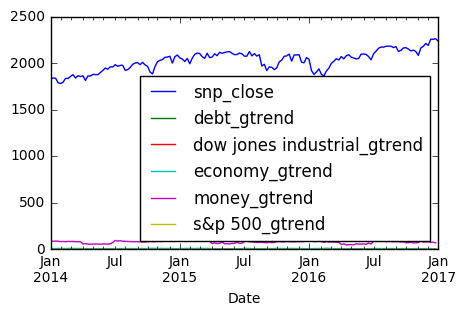

In [300]:
# N.B. A super-useful trick-ette is to assign the return value of plot to _ 
# so that you don't get text printed before the plot itself.

_ = pd.concat([closing_data[k] for k in closing_data.keys()], axis=1).plot(figsize=(5, 3))

In [301]:
scaled_closing_data = pd.DataFrame()
for k in closing_data.keys():
    if "gtrend" in k:
        scaled_closing_data[k] = closing_data[k] / 100.0
    else:
        scaled_closing_data[k] = closing_data[k] / max(closing_data[k])

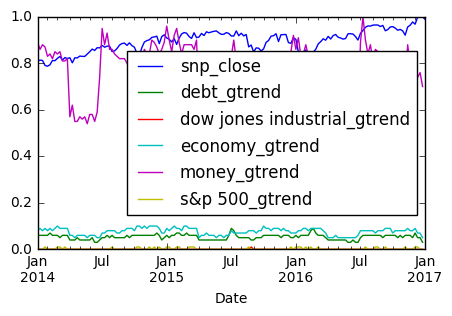

In [302]:
_ = pd.concat([scaled_closing_data[k] for k in scaled_closing_data.keys()], axis=1).plot(figsize=(5, 3))

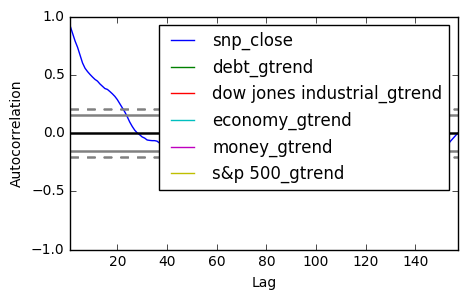

In [303]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(3)

for k in scaled_closing_data.keys():
    _ = autocorrelation_plot(scaled_closing_data[k], label=k)


_ = plt.legend(loc='upper right')

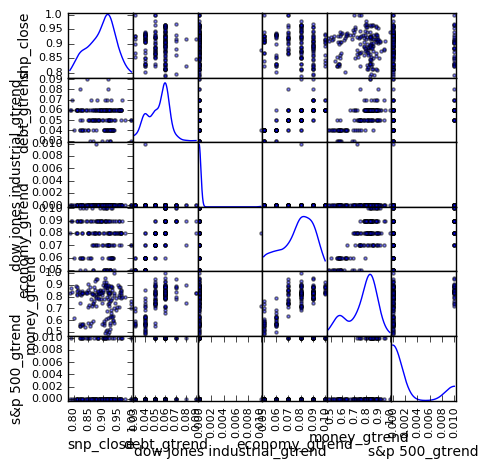

In [304]:
_ = scatter_matrix(pd.concat([scaled_closing_data[k] for k in scaled_closing_data.keys()], axis=1), figsize=(5, 5), diagonal='kde')

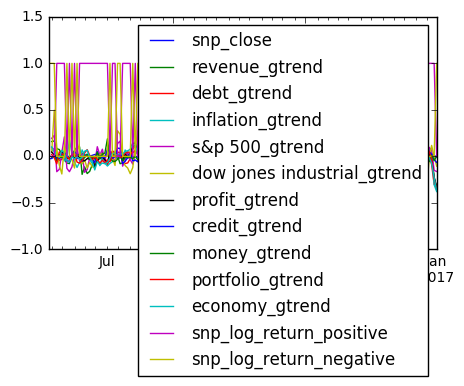

In [305]:
_ = pd.concat([log_return_data[k] for k in log_return_data.keys()], axis=1).plot(figsize=(5, 3))

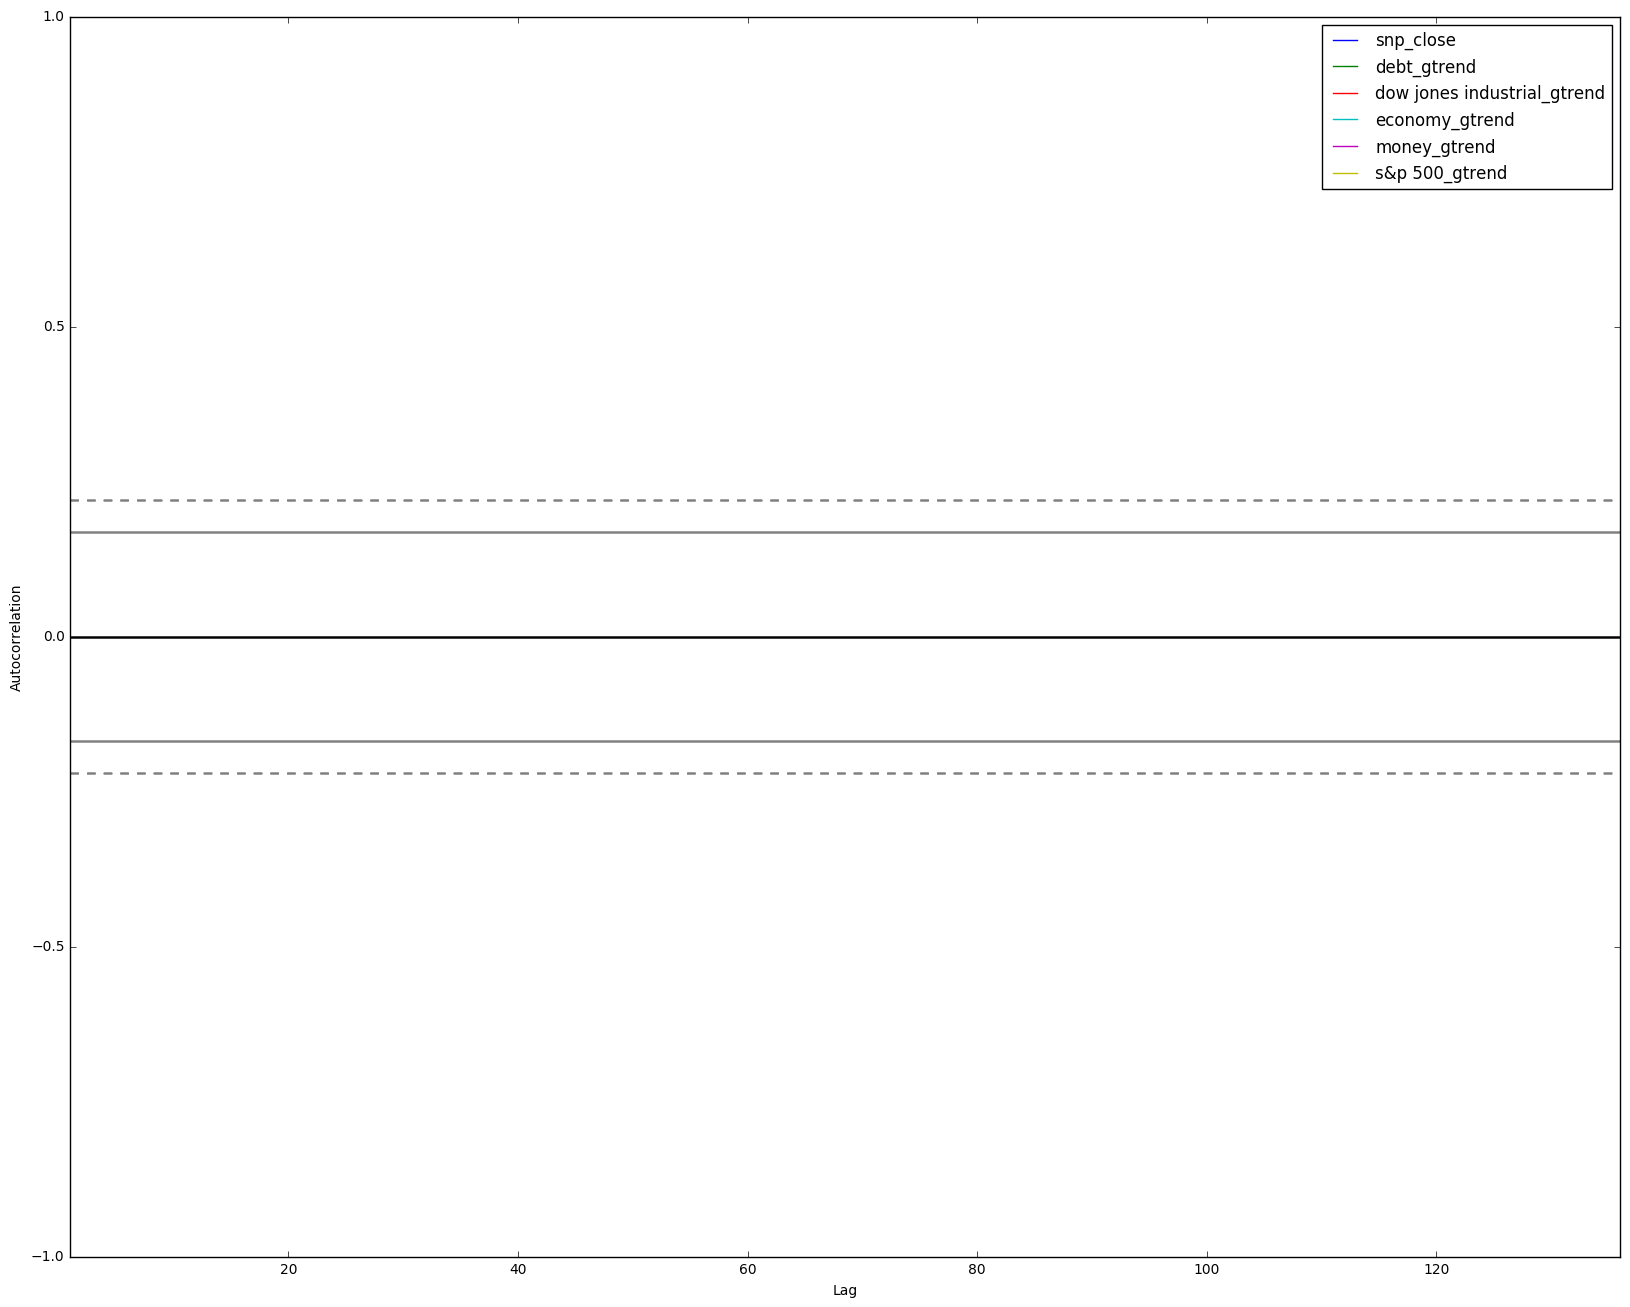

In [306]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(16)

for k in log_avg_return_data2.keys():
    _ = autocorrelation_plot(log_avg_return_data2[k], label=k)

_ = plt.legend(loc='upper right')

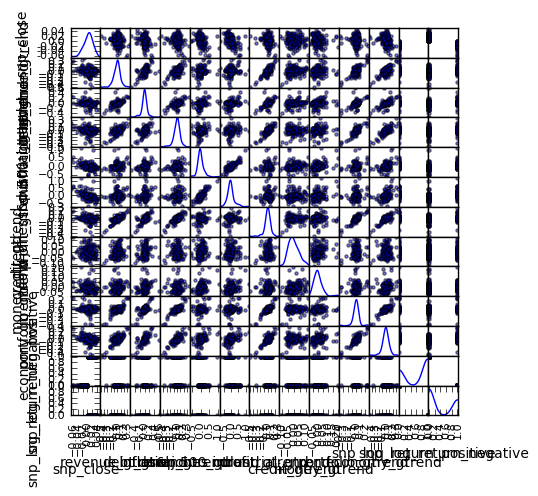

In [307]:
_ = scatter_matrix(log_return_data, figsize=(5, 5), diagonal='kde')

In [308]:
log_avg_return_data.corr().iloc[:,0]

snp_close                      1.000000
debt_gtrend                    0.037771
dow jones industrial_gtrend         NaN
economy_gtrend                -0.024848
money_gtrend                   0.101584
s&p 500_gtrend                 0.442682
Name: snp_close, dtype: float64

In [309]:
tmp = pd.DataFrame()
for k in log_return_data:
    if k == "snp_close":
        tmp[k] = log_return_data[k]
    tmp[k] = log_return_data[k].shift()
tmp.corr().iloc[:,0]


snp_close                      1.000000
revenue_gtrend                -0.246222
debt_gtrend                   -0.270103
inflation_gtrend              -0.234090
s&p 500_gtrend                -0.404675
dow jones industrial_gtrend   -0.500218
profit_gtrend                 -0.256048
credit_gtrend                 -0.090399
money_gtrend                  -0.131891
portfolio_gtrend              -0.249084
economy_gtrend                -0.373500
snp_log_return_positive        0.784872
snp_log_return_negative       -0.784872
Name: snp_close, dtype: float64

## TensorFlow



*  snp_log_return_positive, which is 1 if the log return of the S&P 500 close is positive, and 0 otherwise. 
* snp_log_return_negative, which is 1 if the log return of the S&P 500 close is negative, and 1 otherwise. 


We'll use 80% of our data for training and 20% for testing.

In [332]:
log_return_data = log_avg_return_data
print(log_return_data)

            snp_close  revenue_gtrend  debt_gtrend  inflation_gtrend  \
Date                                                                   
2014-01-26  -0.026017             NaN          NaN               NaN   
2014-02-02  -0.022848        0.159792     0.092170          0.070618   
2014-02-09  -0.003799        0.165985     0.070316          0.053859   
2014-02-16   0.026824        0.082692     0.025479         -0.039375   
2014-02-23   0.016567        0.073820    -0.044736         -0.019418   
2014-03-02   0.019267        0.022990    -0.032157          0.015444   
2014-03-09   0.017870       -0.035091     0.006431         -0.048202   
2014-03-16  -0.009074       -0.071459    -0.046520         -0.015937   
2014-03-23   0.003747       -0.078068    -0.054067          0.178330   
2014-03-30  -0.002300        0.024391     0.026492          0.033523   
2014-04-06   0.005376        0.064022    -0.027399         -0.060169   
2014-04-13  -0.025764        0.100083     0.000000         -0.11

In [333]:
log_return_data['snp_log_return_positive'] = 0
log_return_data.ix[log_return_data['snp_close'] >= 0, 'snp_log_return_positive'] = 1
log_return_data['snp_log_return_negative'] = 0
log_return_data.ix[log_return_data['snp_close'] < 0, 'snp_log_return_negative'] = 1

#log_return_data.drop(log_return_data.index[[0,1]], inplace=True)


training_test_data = log_return_data
log_return_data.describe()

,snp_close,revenue_gtrend,debt_gtrend,inflation_gtrend,s&p 500_gtrend,dow jones industrial_gtrend,profit_gtrend,credit_gtrend,money_gtrend,portfolio_gtrend,economy_gtrend,snp_log_return_positive,snp_log_return_negative
count,154.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,154.000000,154.000000
mean,0.002560,-0.006442,-0.006281,-0.004695,-0.004151,-0.006302,-0.003976,-0.000771,0.000039,-0.005831,-0.003779,0.629870,0.370130
std,0.020281,0.112984,0.130036,0.106358,0.200945,0.254408,0.091793,0.044406,0.045626,0.083279,0.108456,0.484415,0.484415
min,-0.066183,-0.483427,-0.559616,-0.480172,-0.595983,-0.725041,-0.484055,-0.117783,-0.084307,-0.385225,-0.466730,0.000000,0.000000
25%,-0.009173,-0.069733,-0.041673,-0.048202,-0.096228,-0.125163,-0.036871,-0.033152,-0.027780,-0.032790,-0.049271,0.000000,0.000000
50%,0.005013,0.005063,0.000000,0.010309,-0.026668,-0.028573,0.003630,-0.007463,-0.004494,0.000000,0.000000,1.000000,0.000000
75%,0.016366,0.041891,0.042560,0.046520,0.055570,0.057158,0.041127,0.024868,0.021599,0.029981,0.053803,1.000000,1.000000
max,0.050246,0.368286,0.603916,0.362905,1.069053,1.215146,0.300686,0.124053,0.206614,0.272592,0.344165,1.000000,1.000000


Now, create the training and test data.

In [334]:
predictors_tf = training_test_data[training_test_data.columns[1:-2]]

classes_tf = training_test_data[training_test_data.columns[-2:]]

training_set_size = int(len(training_test_data) * 0.8)
test_set_size = len(training_test_data) - training_set_size

training_predictors_tf = predictors_tf[:training_set_size]
training_classes_tf = classes_tf[:training_set_size]
test_predictors_tf = predictors_tf[training_set_size:]
test_classes_tf = classes_tf[training_set_size:]

training_predictors_tf.describe()

,revenue_gtrend,debt_gtrend,inflation_gtrend,s&p 500_gtrend,dow jones industrial_gtrend,profit_gtrend,credit_gtrend,money_gtrend,portfolio_gtrend,economy_gtrend
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,-0.002425,-0.002749,-0.001964,-0.001810,-0.002110,-0.001083,-0.000822,0.000882,-0.002805,-0.000056
std,0.118112,0.136114,0.104616,0.182958,0.243204,0.091843,0.045696,0.040946,0.083076,0.107791
min,-0.483427,-0.559616,-0.480172,-0.595983,-0.725041,-0.484055,-0.117783,-0.084307,-0.385225,-0.466730
25%,-0.069548,-0.041256,-0.046805,-0.088676,-0.120628,-0.030271,-0.033430,-0.024955,-0.033062,-0.046785
50%,0.002611,0.000000,0.003981,-0.020940,-0.026052,0.005280,-0.007634,-0.004377,-0.001751,0.007968
75%,0.054819,0.043032,0.045439,0.065637,0.050848,0.040798,0.025069,0.026067,0.030513,0.053663
max,0.368286,0.603916,0.362905,1.069053,1.215146,0.300686,0.124053,0.189086,0.272592,0.344165


In [328]:
training_classes_tf.describe()

,snp_log_return_positive,snp_log_return_negative
count,125.000000,125.000000
mean,0.560000,0.432000
std,0.498384,0.497348
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [345]:
def tf_confusion_metrics(model, actual_classes, session, feed_dict):
    predictions = tf.argmax(model, 1)
    actuals = tf.argmax(actual_classes, 1)

    ones_like_actuals = tf.ones_like(actuals)
    zeros_like_actuals = tf.zeros_like(actuals)
    ones_like_predictions = tf.ones_like(predictions)
    zeros_like_predictions = tf.zeros_like(predictions)

    tp_op = tf.reduce_sum(
        tf.cast(
          tf.logical_and(
            tf.equal(actuals, ones_like_actuals), 
            tf.equal(predictions, ones_like_predictions)
          ), 
          "float"
        )
    )

    tn_op = tf.reduce_sum(
        tf.cast(
          tf.logical_and(
            tf.equal(actuals, zeros_like_actuals), 
            tf.equal(predictions, zeros_like_predictions)
          ), 
          "float"
        )
    )

    fp_op = tf.reduce_sum(
        tf.cast(
          tf.logical_and(
            tf.equal(actuals, zeros_like_actuals), 
            tf.equal(predictions, ones_like_predictions)
          ), 
          "float"
        )
    )

    fn_op = tf.reduce_sum(
        tf.cast(
          tf.logical_and(
            tf.equal(actuals, ones_like_actuals), 
            tf.equal(predictions, zeros_like_predictions)
          ), 
          "float"
        )
    )

    tp, tn, fp, fn = \
        session.run(
          [tp_op, tn_op, fp_op, fn_op], 
          feed_dict
    )

    tpr = float(tp)/(float(tp) + float(fn))
    fpr = float(fp)/(float(tp) + float(fn))

    accuracy = (float(tp) + float(tn))/(float(tp) + float(fp) + float(fn) + float(tn))

    recall = tpr
    precision = float(tp)/(float(tp) + float(fp) + 0.01)

    f1_score = (2 * (precision * recall)) / (precision + recall + 0.01)

    print ('Precision = ', precision)
    print ('Recall = ', recall)
    print ('F1 Score = ', f1_score)
    print ('Accuracy = ', accuracy)

### Binary classification with TensorFlow

In [348]:
sess = tf.Session()

# Define variables for the number of predictors and number of classes to remove magic numbers from our code.
num_predictors = len(training_predictors_tf.columns) # 24 in the default case
num_classes = len(training_classes_tf.columns) # 2 in the default case

# Define placeholders for the data we feed into the process - feature data and actual classes.
feature_data = tf.placeholder("float", [None, num_predictors])
actual_classes = tf.placeholder("float", [None, num_classes])

# Define a matrix of weights and initialize it with some small random values.
weights = tf.Variable(tf.truncated_normal([num_predictors, num_classes], stddev=0.0001))
biases = tf.Variable(tf.ones([num_classes]))

# Define our model...
# Here we take a softmax regression of the product of our feature data and weights.
model = tf.nn.softmax(tf.matmul(feature_data, weights) + biases)

# Define a cost function (we're using the cross entropy).
cost = -tf.reduce_sum(actual_classes*tf.log(model))

# Define a training step...
# Here we use gradient descent with a learning rate of 0.01 using the cost function we just defined.
training_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

init = tf.initialize_all_variables()
sess.run(init)

In [349]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(actual_classes, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

for i in range(1, 30001):
  sess.run(
    training_step, 
    feed_dict={
      feature_data: training_predictors_tf.values, 
      actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
    }
  )
  if i%5000 == 0:
    print (i, sess.run(
      accuracy,
      feed_dict={
        feature_data: training_predictors_tf.values, 
        actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
      }
    ))

5000 0.626016
10000 0.626016
15000 0.626016
20000 0.626016
25000 0.626016
30000 0.626016


In [350]:
feed_dict= {
  feature_data: test_predictors_tf.values,
  actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
}

tf_confusion_metrics(model, actual_classes, sess, feed_dict)

Precision =  0.0
Recall =  0.0
F1 Score =  0.0
Accuracy =  0.6451612903225806


### Feed-forward neural network with two hidden layers

In [342]:
sess1 = tf.Session()

num_predictors = len(training_predictors_tf.columns)
num_classes = len(training_classes_tf.columns)

feature_data = tf.placeholder("float", [None, num_predictors])
actual_classes = tf.placeholder("float", [None, 2])

weights1 = tf.Variable(tf.truncated_normal([10, 50], stddev=0.0001))
biases1 = tf.Variable(tf.ones([50]))

weights2 = tf.Variable(tf.truncated_normal([50, 25], stddev=0.0001))
biases2 = tf.Variable(tf.ones([25]))
                     
weights3 = tf.Variable(tf.truncated_normal([25, 2], stddev=0.0001))
biases3 = tf.Variable(tf.ones([2]))

hidden_layer_1 = tf.nn.relu(tf.matmul(feature_data, weights1) + biases1)
hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1, weights2) + biases2)
model = tf.nn.softmax(tf.matmul(hidden_layer_2, weights3) + biases3)

cost = -tf.reduce_sum(actual_classes*tf.log(model))

train_op1 = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

init = tf.initialize_all_variables()
sess1.run(init)

In [343]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(actual_classes, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

for i in range(1, 30001):
  sess1.run(
    train_op1, 
    feed_dict={
      feature_data: training_predictors_tf.values, 
      actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
    }
  )
  if i%5000 == 0:
    print (i, sess1.run(
      accuracy,
      feed_dict={
        feature_data: training_predictors_tf.values, 
        actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
      }
    ))

5000 0.626016
10000 0.626016
15000 0.626016
20000 0.626016
25000 0.626016
30000 0.626016


In [344]:
feed_dict= {
  feature_data: test_predictors_tf.values,
  actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
}

tf_confusion_metrics(model, actual_classes, sess1, feed_dict)

Precision =  0.0
Recall =  0.0
F1 Score =  0.0
Accuracy =  0.6451612903225806
